In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

In [60]:
N_samples = 100000
radius = 0.5
dimensions = 5
radius = 0.5

In [61]:
b1 = np.array([2, -1, 0, 0, 0.2])
b2 = np.array([-1, 0.5, 0, 0.1, 0])
b3 = np.array([-3, 2, -0.1, 0, 0])

def h(x, b1=b1, b2=b2, b3=b3):
    return 0.1 * np.exp(-1/2 * np.sum((x-b1)**2) / 1.2**2) + 0.6 * np.exp(-1/2 * np.sum((x-b2)**2) / 0.9**2) + 0.3 * np.exp(-1/2 * np.sum((x-b3)**2) / 1.0**2)

def q(x, x0):
    if np.linalg.norm(x-x0) <= 0.5:
        return 1.0
    if np.linalg.norm(x-x0) > 0.5:
        return 0.0

In [62]:
# ACCEPT REJECT METHOD
xmin = - 10 * np.ones(5)
xmax = 10 * np.ones(5)

def x_proposal(x0, xmin=xmin, xmax=xmax):

    while True:                  
        x_test = np.random.uniform(np.max(np.stack((xmin, x0-0.5), axis=1), axis=1), np.min(np.stack((xmax, x0+0.5), axis=1), axis=1))
        if q(x_test, x0) == 1.0:
            break
                
    return x_test

In [63]:
def x_h(x_ini):

    x0 = x_ini
    x_accepted = np.zeros((N_samples, 5))

    for i in range(N_samples):

        while True:
            x_test = x_proposal(x0)
            p_accept = min(1, h(x_test)/h(x0))
            if np.random.uniform() < p_accept:
                break
        
        x_accepted[i, :] = x_test
        x0 = x_test
    
    return x_accepted

In [64]:
x_initial = np.array([8, 8, 8, 8, 8])
h_samples = x_h(x_initial)

[[ 8.08483694  7.96402317  7.7476846   7.75133109  7.95524522]
 [ 7.93034573  7.68334017  7.57837041  7.74960594  8.20794027]
 [ 7.72636999  7.63521382  7.4490772   7.83340522  8.45259483]
 ...
 [ 0.75314905 -1.04397399 -1.33015928 -0.68763471 -1.93450229]
 [ 1.16795626 -0.89156009 -1.11268255 -0.72145811 -1.915959  ]
 [ 1.12865902 -0.94091024 -0.94647658 -0.31053629 -1.71163434]]


### Problem 2

Text(0, 0.5, 'log(h)')

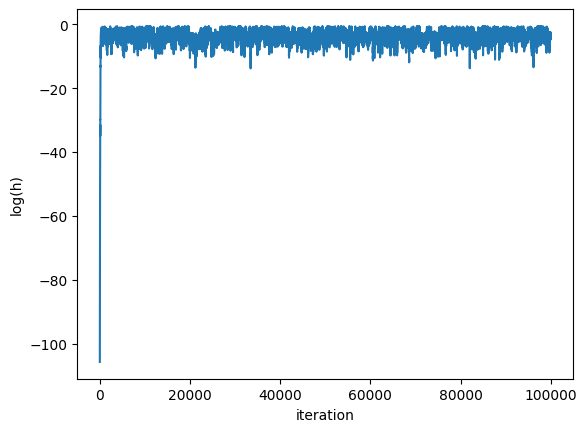

In [69]:
h_values = np.zeros(N_samples)
x1 = np.zeros(N_samples)
x2 = np.zeros(N_samples)

for i in range(N_samples):
    h_values[i] = h(h_samples[i])
    x1[i] = h_samples[i, 0]
    x2[i] = h_samples[i, 1]

i = np.arange(N_samples)

plt.plot(i, np.log(h_values))
plt.xlabel("iteration")
plt.ylabel("log(h)")

Text(0, 0.5, 'log(h)')

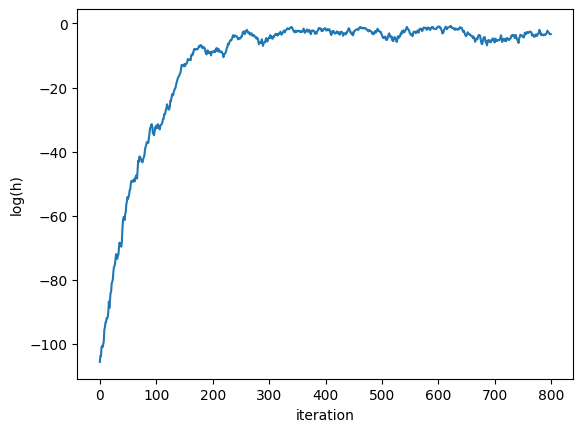

In [70]:
plt.plot(i[0:800], np.log(h_values[0:800]))
plt.xlabel("iteration")
plt.ylabel("log(h)")

### Problem 3

Text(0, 0.5, 'counts')

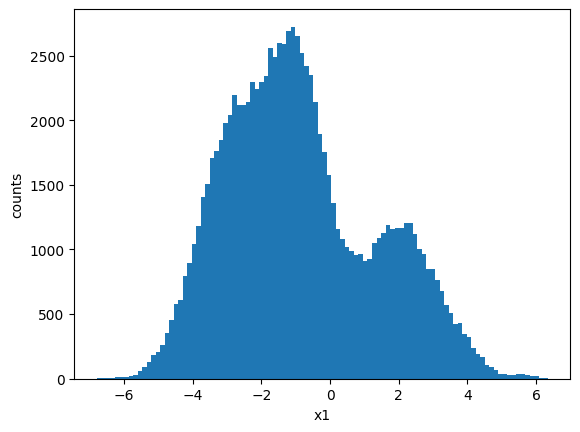

In [71]:
plt.hist(x1[400:], bins=100);
plt.xlabel("x1")
plt.ylabel("counts")

### Problem 4

Text(0, 0.5, 'x2')

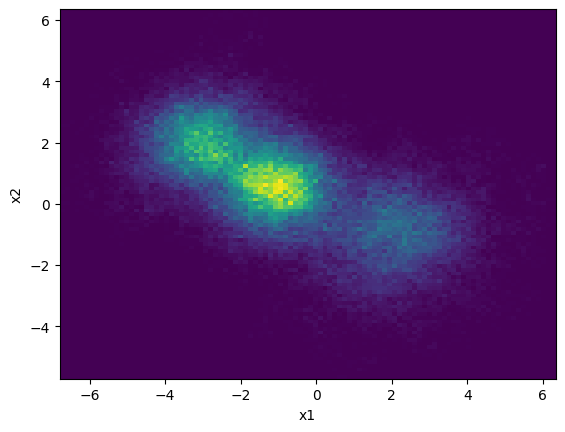

In [73]:
plt.hist2d(x1[400:], x2[400:], bins=100);
plt.xlabel("x1")
plt.ylabel("x2")

### Problem 5

In [76]:
x_mean = 1/N_samples * np.sum(h_samples, axis=0)
print(x_mean)

[-0.84871193  0.60853982 -0.00176149  0.05361909  0.07611358]


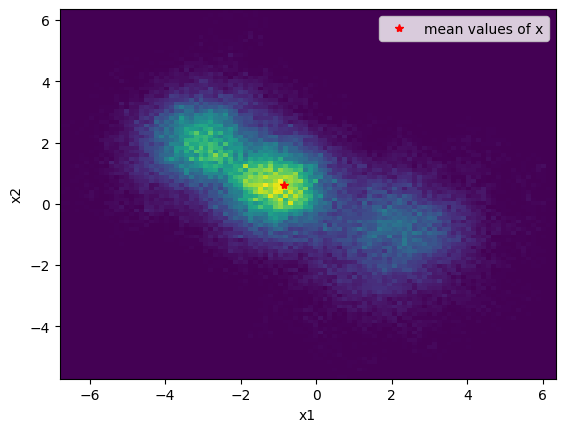

In [81]:
plt.hist2d(x1[400:], x2[400:], bins=100);
plt.plot(x_mean[0], x_mean[1], "r*", label="mean values of x")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

### Problem 6

In [82]:
c12 = 1/N_samples * np.sum((x1 - x_mean[0]) * (x2 - x_mean[1]))
print(c12)

-2.1018704284639433


### Problem 7

The covariance between x1 and x2 is negative. This means that x1 and x2 are anti-correlated. This is in correspondance with the 2D marginal distribition since the slope on this is negative which also indicates anti-correlation.